## Final project. Applied Mathematics / Numerical Analysis / P1.4

Using Lagrangian finite elements with Chebyshev nodes, defined on square, of arbitrary order

Find the solution of 

$$
-\Delta \mathbf u + \mathbf u = \mathbf f \text{ in } \Omega, \qquad n \cdot \delta u = 0 \text{ on } \partial \Omega
$$

on the square $\Omega = [0,1]^2$. For the sake of simplicity you can consider just **one finite element** and homogeneous Neumann boundary conditions. 

The above problem can be rewritten in matrix form as

$$
A u = (K+M) u =  b
$$

where $K$ is the stiffness matrix, and $M$ is the mass matrix.

In order to do so, express $u$ as a linear combination of basis functions, multiply from the left with a basis function, and integrate by parts the laplacian to obtain:

$$
K_{ij} := \int_\Omega \nabla v_i \cdot \nabla v_j,\qquad M_{ij} = \int_\Omega v_i v_j, \qquad b_i = \int_\Omega v_i f
$$

In [78]:

import sympy as sym
import scipy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl

%pylab inline
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 9

Populating the interactive namespace from numpy and matplotlib


/home/doma/.venvs/numerica/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['scatter', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 1 Construct (or use the available functions from numpy/scipy) the chebishev nodes of given order

Once you constructed them, plot them.

Chebyshew nodes:

 [0.00759612 0.0669873  0.1786062  0.32898993 0.5        0.67101007
 0.8213938  0.9330127  0.99240388]


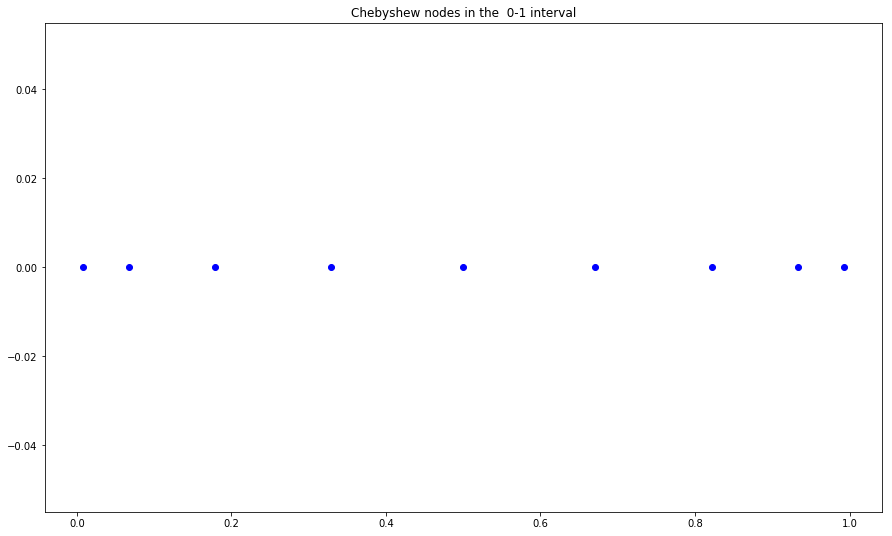

In [120]:
order = 9# You should be able to change this, and everything else should work accordingly

# Call C the chebishev nodes between 0 and 1
C = zeros((order))
# This is used to generate chebyshev nodes between a lower and an upper bound.
low=0
up=1
generator = lambda n: (up+low)/2+(up-low)/2*(np.polynomial.chebyshev.chebgauss(n)[0])

#for some reason the point goes from 1 to 0, so I have to sort them.
C = sort(generator(n=order))
print("Chebyshew nodes:\n\n",C)
#figure(figsize=[15,9])

pl.title("Chebyshew nodes in the  0-1 interval")
pl.plot(C,C*0,"bo");


### 2 Construct (or use the available functions from numpy/scipy) the one-dimensional Lagrange basis functions on the Chebishev nodes
Make sure each entry of basis_1d is a callable function, that you can evaluate at a given point. Plot all of the basis functions, using a numpy array `Vs`, storing all basis functions evaluated on evenly spaced points, called `s`

Vs shape = (9, 257)


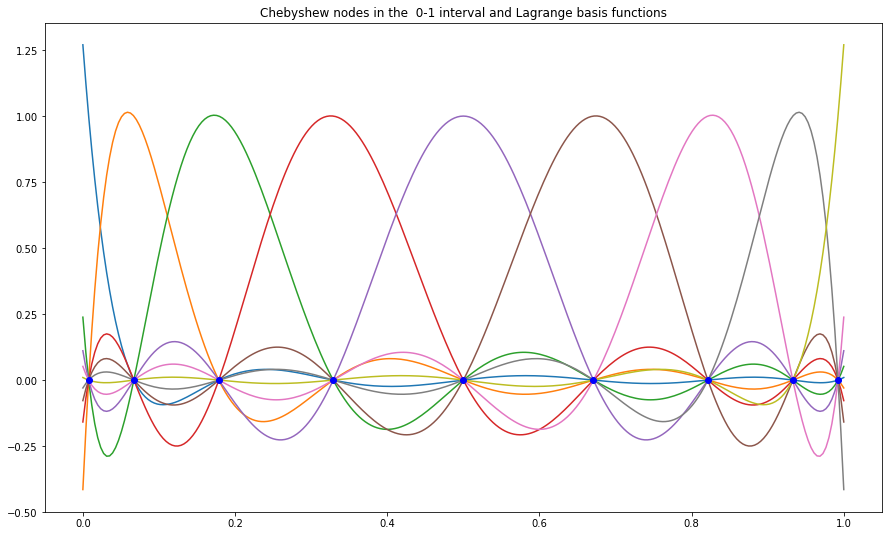

In [80]:
plot_resolution = 257
s = linspace(0, 1, plot_resolution)
Vs = zeros((order,plot_resolution))

basis_1d = [] 

# YOUR CODE HERE to fill basis_1d
Ln = [1.0 for i in range(order)]
# Now construct a symbolic function...
t = sym.var('t')


#Here I define the Lagrange basis functions as symbolyc functions of t, Ln[0] is the first, Ln[1] the second one and so on.
for i in range(order):
    
    for j in range(order):
        
        if j != i:
            Ln[i] *= (t-C[j])/(C[i]-C[j])  
            
#putting the functions in the original list 
for i in range(order):
    basis_1d.append(Ln[i])
    
#enabling evaluation of the function at given points
nbasis_1d = sym.lambdify(t, basis_1d, 'numpy')
#print(nbasis_1d(s)[1].size)

  
#Filling Vs with the values of the basis functions computed in the "s" points
for i in range(order):
    Vs[i,:] = nbasis_1d(s)[i]
 
# ...




print("Vs shape =",Vs.shape)
#figure(figsize=[15,9])
plot(s, Vs.T) ;
pl.plot(C,C*0,"bo");
pl.title("Chebyshew nodes in the  0-1 interval and Lagrange basis functions");

### 3 Construct three one-dimensional quadrature formulas, to integrate the matrices, the right hand side, and the error

In general the size of the quadratures should be selectable by the user.

Anything that should be evaluated on one of quadrature points, should be named accordingly (i.e., using a suffix `m,r,e`) for the three collections

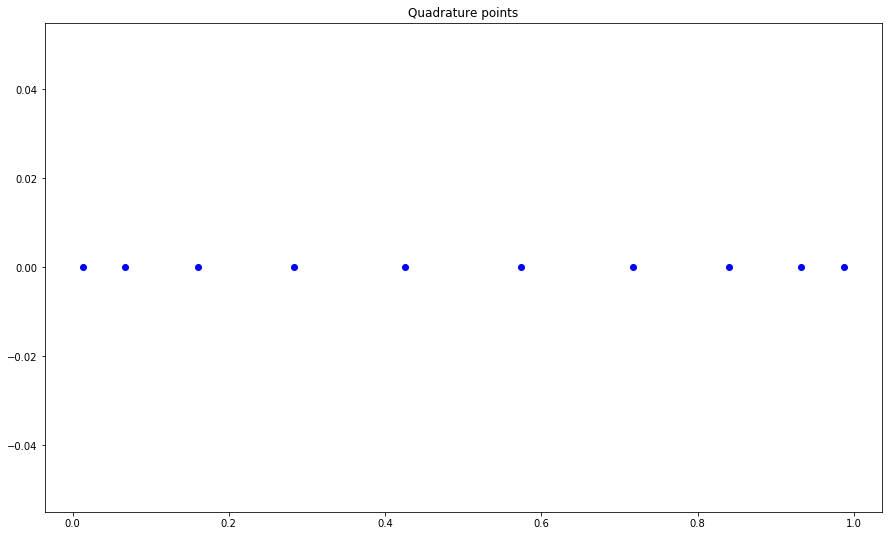

In [81]:
quadrature_size_matrices = 10
quadrature_size_rhs      = 11
quadrature_size_error    = 12

#default interval is [-1,1]
Qm, Wm = np.polynomial.legendre.leggauss(quadrature_size_matrices)  # place here the code to get the quadrature points and weights
Qr, Wr = np.polynomial.legendre.leggauss(quadrature_size_rhs)  # place here the code to get the quadrature points and weights
Qe, We = np.polynomial.legendre.leggauss(quadrature_size_error)  # place here the code to get the quadrature points and weights


#Now we can change the values for the interval [0,1]
Qm, Wm = (Qm/2+1/2), Wm/2
Qr, Wr = (Qr/2+1/2), Wr/2
Qe, We = (Qe/2+1/2), We/2
#print(Qm,Wm)
plot(Qm,Qm*0,"bo");
pl.title("Quadrature points");

### 4 Evaluate all the one dimensional basis functions at each collection of quadrature points

Store the results in three different numpy arrays, one for quadrature. Use suffix `m,r,e` for the arrays representing the basis functions evaluated at the quadrature points to be used for the matrices, rhs, and errors respectively.

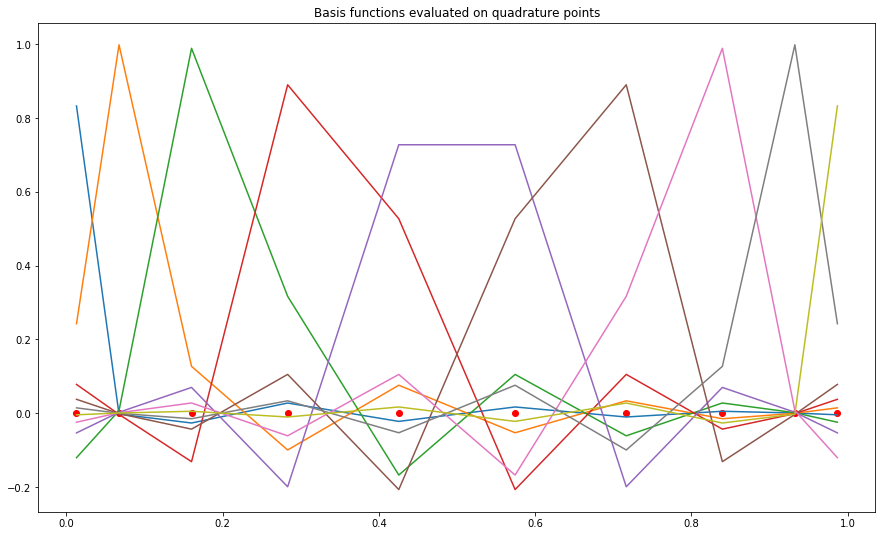

In [122]:
Vm = np.zeros((quadrature_size_matrices, order))
Vr = np.zeros((quadrature_size_rhs,      order))
Ve = np.zeros((quadrature_size_error,    order))


#the column of Vm are the lagrange basis functions evaluated on the quadrature points
for j in range(order):
    Vm[:,j]=nbasis_1d(Qm)[j]
    Vr[:,j]=nbasis_1d(Qr)[j]
    Ve[:,j]=nbasis_1d(Qe)[j]
    
#print(Vm)
pl.plot(Qm,Qm*0,"ro");
pl.plot(Qm,Vm);
pl.title("Basis functions evaluated on quadrature points");
#print(Vm.shape)


### 5 Evaluate the derivatives of the basis functions at each collection of quadrature points

Store the results in three different numpy arrays, one for quadrature. Use suffix `m,r,e` for the arrays representing the basis functions evaluated at the quadrature points to be used for the matrices, rhs, and errors respectively.

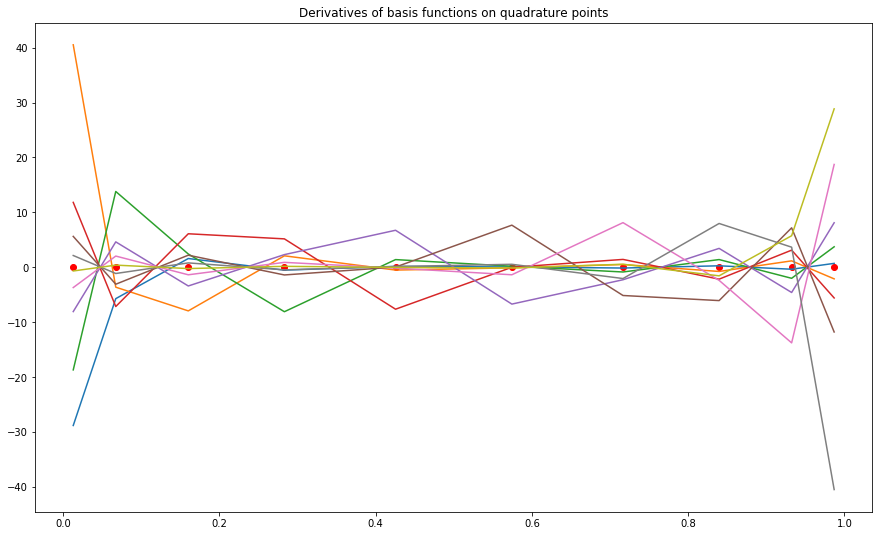

In [83]:
Dm = zeros((quadrature_size_matrices, order))
Dr = zeros((quadrature_size_rhs,      order))
De = zeros((quadrature_size_error,    order))


#same as in block 2 but differentiating the function
dbasis_1d = []
for j in range(order):
    dbasis_1d.append ( basis_1d[j].diff(t,1) ) 
#the column of Vm are the lagrange basis functions evaluated on the quadrature points
#print(dbasis_1d)
#enabling evaluation of the function at given points
ndbasis_1d = sym.lambdify(t, dbasis_1d, 'numpy')


for j in range(order):
    Dm[:,j]=ndbasis_1d(Qm)[j]
    Dr[:,j]=ndbasis_1d(Qr)[j]
    De[:,j]=ndbasis_1d(Qe)[j]
#print(Dm)
plot(Qm,Qm*0,"ro");
plot(Qm,Dm);
pl.title("Derivatives of basis functions on quadrature points");#visual check of derivatives.



### 6 Construct the two dimensional quadrature formulas as tensor products of the one dimensional ones

Given two one dimensional quadrature formulas with points $x_r$ and $y_q$, we can construct the corresponding two dimensional quadrature formulas by using `einsum` to obtain the weights of higher dimensional tensor product quadrature formulas, on the points $(x_r, y_q)$:

$$
X_{qr} = (x_r, y_q),  J2_{qr} = w_r w_q
$$

Use lexycographical ordering w.r.t. to C: `x` runs faster than `y`.

Integration of a scalar function of two variables on the square can then be approximated as

$$
\int_0^1 \int_0^1 f(x,y) dx \, dy \sim \sum_{r=0}^{n_q-1}\sum_{q=0}^{n_q-1} f(x_r, y_q)  w_r w_q = \sum_{r=0}^{n_q-1}\sum_{q=0}^{n_q-1} f(X_{qr})  J_{qr}
$$


In [84]:
W2m = einsum('q,r -> qr',Wm, Wm)
W2r = einsum('q,r -> qr',Wr, Wr)
W2e = einsum('q,r -> qr',We, We)



#mini tutorial einsum
#a = np.arange(25).reshape(5,5)
#b = np.arange(5)
#c = np.arange(6).reshape(2,3)
#print(a)
#somma elementi in diagonale
#np.einsum("ii",a)
#elementi in diagonale
#np.einsum('ii->i', a)
#prodotto matrice vettore
#np.einsum('ij,j', a, b)
#trasposta
#np.einsum('ji', c)
#outer product
#b2 = einsum('q,r -> qr',b, b)

#print(Q2m)

### 7 Construct the two dimensional basis functions as tensor products of the one dimensional ones

Given a set of one dimensional basis functions, one can construct the tensor product space for two dimensional problems by defining

$$
V_{ij}(x,y) := v_i(y) v_j(x), \quad i,j = 0,\ldots,n-1.
$$

If we only need these to be evaluated at some quadrature points, $V_{iq} = v_i(x_q)$, we can construct the corresponding two dimensional basis functions by using `einsum` to obtain higher dimensional arrays on tensor product points:

$$
V2_{qr\, ij} =  v_i(y_q) v_j(x_r)
$$

representing one two dimensional basis function (identified by the two indices $i,j$, one indicating the $j$-th basis function along $x$, and the other identifying the $i$-th basis function along $y$), evaluated at the point $(x_r, y_q)$.

Notice that we use lexycographical ordering: `x` runs faster than `y`, both for the numbering of the basis functions and for the order of the quadrature points. Moreover, we group together the indices running over the quadrature poitns, and the ones running over the basis function indices, while maintaining the lexycographical ordering.

This allows you to resize the arrays, so that the results only have two dimensional matrices, with shape `(quadrature_size_xxx^2,order^2)`. 

In [85]:
# Vs has the values of the basis functions computed in the "s" points, V2s the same on the 2D array.
V2s = einsum('iq, jr -> qrij', Vs, Vs)
#PROVA
#V2s = einsum('qi, rj -> qrij', Vs, Vs)


#print(Vs.shape)
#print(V2s.reshape(order**2,quadrature_size_matrices**2).shape)


#the column of Vm are the lagrange basis functions evaluated on the quadrature points, so V2m are the 2D evaluation of basis
#functions on quadrature points
V2m = einsum('iq, jr -> qrij', Vm, Vm)
#print(V2m.shape)
#print(V2m.reshape(quadrature_size_matrices**2,order**2).shape)
V2r = einsum('iq, jr -> qrij', Vr, Vr)
V2e = einsum('iq, jr -> qrij', Ve, Ve)

# ...

VDm = einsum('iq, jr -> qrij', Vm, Dm)
DVm = einsum('iq, jr -> qrij', Dm, Vm)

Notice that, since you used the correct ordering, you can actually plot some of the basis functions, for example the 2 along x, 3 along y, as:

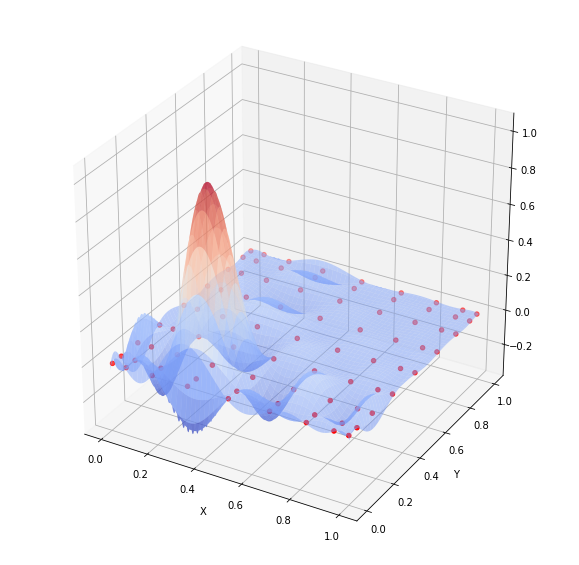

In [86]:

X = meshgrid(s, s)
Q = meshgrid(C, C)

fig = figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
surf2 = ax.plot_surface(X[0], X[1], V2s[:,:,2,3], rstride=5, cstride=5, cmap=cm.coolwarm, alpha=0.5)
scatter = ax.scatter(Q[0], Q[1], zeros_like(Q[0]), c='r', marker='o')

### 8 Assemble the matrices and the right hand side

Using `einsum`, assemble the arrays representing the matrices and then resize them to be two-dimensional. Careful on how the stiffness matrix is defined:

$$
K_{ij \, kl} = \int_{\Omega} \nabla v_{ij} \cdot \nabla v_{kl} = \sum_q \sum_r (v'_j(x_r)v_i(y_q) v'_l(x_r)v_k(y_q) +v_j(x_r)v'_i(y_q) v_l(x_r)v'_k(y_q) )w_r w_q
$$

Using summation convention, this is equivalent to:

```
(Vm[i][q]*Dm[j][r] Vm[k][q]*Dm[l][r] + Dm[i][q]*Vm[j][r] *Dm[k][q]Vm[l][r])W[r]*W[q]
```
or
```
(VDm[q][r][i][j]^2 + DVm[q][r][i][j]^2)W2[q,r]
```

In [87]:
#V2m = V2m.reshape(quadrature_size_matrices**2,order**2)
#first two indexes are the number of basis function and second one the number of quadrature points.
#print(V2m.shape)

#print(Wm.shape)


#here I changed the index ordering from qrij to ijqr because otherwise I am not consistent with previous formulation
#so here i sum on the quadrature points and I am left with the values of the numerically integrated quantity on the
#cheb points
M = einsum('ijqr, klqr, q, r', V2m, V2m, Wm, Wm)

#M = einsum('qrij, qrkl, qr', V2m, V2m, W2m)
M = M.reshape((order**2, order**2))

# Your code here to assemble and reshape K
D2m = einsum('iq, jr -> qrij', Dm, Dm)

#applico alla lettera la formula conigliata dividendo in due parti.
K = einsum('ijqr, klqr, q, r', VDm, VDm, Wm, Wm) + einsum('ijqr, klqr, q, r', DVm, DVm, Wm, Wm) 

K = K.reshape((order**2, order**2))

#e questa è la matrice finale
A = K+M



### 9 Using a known solution, construct a right hand side that would produce the given solution, and assemble it

Given a solution that satisfies the boundary conditions (for example:) 

$$
u(x,y) = \cos(\pi x)\cos(3\pi y)
$$
compute its laplacian, put a minus in front of it, and sum $u$ to it. The result is the forcing term $f$ that you have to use in order to obtain $u$ as a solution to the problem. Call it `my_function`, compute the right hand side by integrating with the basis functions and reshape it to be a vector of size `order^2`:

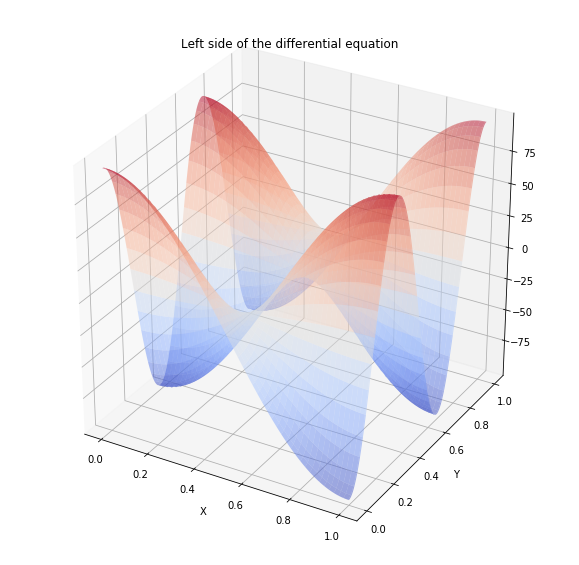

In [88]:




#io voglio la soluzione in ogni coppia di punti del quadrato

def my_function(x,y):
    # put your code here to compute f
    F = zeros((len(y), len(x)))
    #print(F.shape)
    # Now construct a symbolic function...
    xx = sym.var('xx')
    yy = sym.var('yy')
    #defining the solution
    u = sym.cos(np.pi*xx)*sym.cos(3*np.pi*yy)
   
    #computing laplacian
    dx_u=u.diff(xx,2)
    dy_u=u.diff(yy,2)
    lap_u=dx_u+dy_u
    #defining the function
    function = - lap_u + u
    f = sym.lambdify((xx,yy),function,"numpy")
    F=f(x,y)
    return F





#print(Qr)
Q2r = meshgrid(Qr,Qr)

Fr = my_function(Q2r[0],Q2r[1])
#print("Fr=",Fr)

#plotting the function
fig = figure(figsize=[10,10])
ax = fig.gca(projection='3d')
X = meshgrid(s, s)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Left side of the differential equation")#Same as u but different amplitude, ok!
surf3 = ax.plot_surface(X[0], X[1], my_function(X[0],X[1]), rstride=5, cstride=5, cmap=cm.coolwarm, alpha=0.5)




#print(W2r.shape)
#print(Fr.shape)
#print(V2r.shape)
b = einsum('ijqr, qr, qr', V2r, Fr, W2r)
b = b.reshape((order**2))


### 10 Solve the linear system, and plot the solution

Use a direct solver to solve the linear system. Once you have the coefficients `u` as a vector, reshape it to a matrix, and use einsum to have its values on the `s` space.

(9, 257)
(257, 257, 9, 9)
[ 9.93806666e-01  9.72157162e-01  8.41661976e-01  5.08745209e-01
  1.35267118e-15 -5.08745209e-01 -8.41661976e-01 -9.72157162e-01
 -9.93806666e-01]
(257, 257)


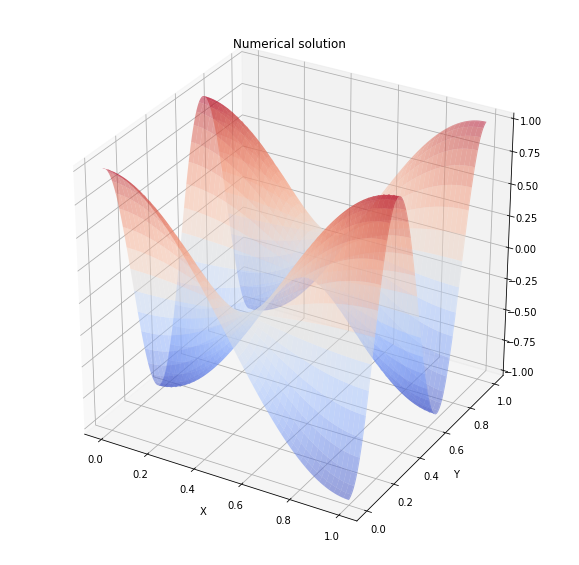

In [116]:
u = solve(A,b)
u = reshape(u, (order, order))
print(Vs.shape)
print(V2s.shape)
print(u[0])
us = einsum('qrij, ij', V2s, u)
print(us.shape)
X = meshgrid(s, s)
Q = meshgrid(C, C)

fig = figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Numerical solution")
surf2 = ax.plot_surface(X[0], X[1], us, rstride=5, cstride=5, cmap=cm.coolwarm, alpha=0.5)


### 11 Compute the L2 error of the solution

The L2 error is defined as 

$$
\| u - u_h \| := \sqrt{\int_\Omega (u(x,y) - u^{ij} V_{ij}(x,y))^2 dx\, dy } \sim \sqrt{\sum_q \sum_r (u(x_r, y_q) -V_{qrij} u^{ij})^2 W_{qr}}
$$

use the quadrature formula and the matrix you constructed above to compute the approximate solutions at the quadrature points.

In [90]:
def my_function(x,y):
    # put your code here to compute f
    F = zeros((len(y), len(x)))
    #print(F.shape)
    # Now construct a symbolic function...
    xx = sym.var('xx')
    yy = sym.var('yy')
    #defining the solution
    u = sym.cos(np.pi*xx)*sym.cos(3*np.pi*yy)
   
    
    f = sym.lambdify((xx,yy),u,"numpy")
    F=f(x,y)
    return F





#the quadrature points are Q2e, theu are stored as a list with x elements in rows and y denoting the j_th row.
Q2e=meshgrid(Qe,Qe)
#print(len(Q2e[0][0]))

#print(len(Q2e))

#this is the u(x_r,y_q)
Fe = my_function(Q2e[0],Q2e[1])


#print(u)


right = einsum("ijqr,ij",V2e,u)
left = Fe
to_square=(left-right)

error = sqrt( einsum("rq,rq",to_square**2,W2e))
print("Error=",error)








Error= 0.0045445734860675505


### 12 Group together all of the above in a function

The function should take as input the `degree` of the one dimensional basis space, the degrees of the three quadrature formulas, a number of points where you want to produce the outputs.


Once you have the function, create a `log-log` plot of the L2 error with respect to the input degree

In [117]:
plot_resolution = 257



some_points=np.array([0,0.2,0.4])
some_points_squared=meshgrid(some_points)
order = 9# You should be able to change this, and everything else should work accordingly

def my_little_function (order=10, quadrature_size_matrices=10,quadrature_size_rhs=11,quadrature_size_error=12,points_for_plot=plot_resolution):

    #block 1, cheb

    # Call C the chebishev nodes between 0 and 1
    C = zeros((order))
    # This is used to generate chebyshev nodes between a lower and an upper bound.
    low=0
    up=1
    generator = lambda n: (up+low)/2+(up-low)/2*(np.polynomial.chebyshev.chebgauss(n)[0])
    #for some reason the point goes from 1 to 0, so I have to sort them.
    C = sort(generator(n=order))


    #block 2, lagrange on cheb

   
    s = linspace(0, 1, points_for_plot)
    Vs = zeros((order,points_for_plot))

    basis_1d = [] 


    Ln = [1.0 for i in range(order)]
    # Now construct a symbolic function...
    t = sym.var('t')


    #Here I define the Lagrange basis functions as symbolyc functions of t, Ln[0] is the first, Ln[1] the second one and so on.
    for i in range(order):

        for j in range(order):

            if j != i:
                Ln[i] *= (t-C[j])/(C[i]-C[j])  

    #putting the functions in the original list 
    for i in range(order):
        basis_1d.append(Ln[i])

    #enabling evaluation of the function at given points
    nbasis_1d = sym.lambdify(t, basis_1d, 'numpy')
    #print(nbasis_1d(s)[1].size)

  
    #Filling Vs with the values of the basis functions computed in the "s" points
    for i in range(order):
        Vs[i,:] = nbasis_1d(s)[i]


    #block 3 quadrature points

    #default interval is [-1,1]
    Qm, Wm = np.polynomial.legendre.leggauss(quadrature_size_matrices)  # place here the code to get the quadrature points and weights
    Qr, Wr = np.polynomial.legendre.leggauss(quadrature_size_rhs)  # place here the code to get the quadrature points and weights
    Qe, We = np.polynomial.legendre.leggauss(quadrature_size_error)  # place here the code to get the quadrature points and weights


    #Now we can change the values for the interval [0,1]
    Qm, Wm = (Qm/2+1/2), Wm/2
    Qr, Wr = (Qr/2+1/2), Wr/2
    Qe, We = (Qe/2+1/2), We/2


    #block 4 evaluate basis functions on quadrature points

    Vm = np.zeros((quadrature_size_matrices, order))
    Vr = np.zeros((quadrature_size_rhs,      order))
    Ve = np.zeros((quadrature_size_error,    order))


    #the column of Vm are the lagrange basis functions evaluated on the quadrature points
    for j in range(order):
        Vm[:,j]=nbasis_1d(Qm)[j]
        Vr[:,j]=nbasis_1d(Qr)[j]
        Ve[:,j]=nbasis_1d(Qe)[j]


    #block 5 derivatives

    Dm = zeros((quadrature_size_matrices, order))
    Dr = zeros((quadrature_size_rhs,      order))
    De = zeros((quadrature_size_error,    order))


    #same as in block 2 but differentiating the function
    dbasis_1d = []
    for j in range(order):
        dbasis_1d.append ( basis_1d[j].diff(t,1) ) 
    #the column of Vm are the lagrange basis functions evaluated on the quadrature points
   
    #enabling evaluation of the function at given points
    ndbasis_1d = sym.lambdify(t, dbasis_1d, 'numpy')


    for j in range(order):
        Dm[:,j]=ndbasis_1d(Qm)[j]
        Dr[:,j]=ndbasis_1d(Qr)[j]
        De[:,j]=ndbasis_1d(Qe)[j]


    #block 6 going 2D


    W2m = einsum('q,r -> qr',Wm, Wm)
    W2r = einsum('q,r -> qr',Wr, Wr)
    W2e = einsum('q,r -> qr',We, We)


    #block 7 going 2D on basis functions

    # Vs has the values of the basis functions computed in the "s" points, V2s the same on the 2D array.
    V2s = einsum('iq, jr -> qrij', Vs, Vs)





    #the column of Vm are the lagrange basis functions evaluated on the quadrature points, so V2m are the 2D evaluation of basis
    #functions on quadrature points
    V2m = einsum('iq, jr -> qrij', Vm, Vm)
    V2r = einsum('iq, jr -> qrij', Vr, Vr)
    V2e = einsum('iq, jr -> qrij', Ve, Ve)

    # ...

    VDm = einsum('iq, jr -> qrij', Vm, Dm)
    DVm = einsum('iq, jr -> qrij', Dm, Vm)

    #Block 8 building the matrixes




    #here I changed the index ordering from qrij to ijqr because otherwise I am not consistent with previous formulation
    #so here i sum on the quadrature points and I am left with the values of the numerically integrated quantity on the
    #cheb points
    M = einsum('ijqr, klqr, q, r', V2m, V2m, Wm, Wm)

    M = M.reshape((order**2, order**2))

    D2m = einsum('iq, jr -> qrij', Dm, Dm)

    #applico alla lettera la formula conigliata dividendo in due parti.
    K = einsum('ijqr, klqr, q, r', VDm, VDm, Wm, Wm) + einsum('ijqr, klqr, q, r', DVm, DVm, Wm, Wm) 

    K = K.reshape((order**2, order**2))

    #e questa è la matrice finale
    A = K+M

    #Block 9 using a known solution to build right part





    #io voglio la soluzione in ogni coppia di punti del quadrato

    def my_function(x,y):
        # put your code here to compute f
        F = zeros((len(y), len(x)))
        #print(F.shape)
        # Now construct a symbolic function...
        xx = sym.var('xx')
        yy = sym.var('yy')
        #defining the solution
        u = sym.cos(np.pi*xx)*sym.cos(3*np.pi*yy)

        #computing laplacian
        dx_u=u.diff(xx,2)
        dy_u=u.diff(yy,2)
        lap_u=dx_u+dy_u
        #defining the function
        function = - lap_u + u
        f = sym.lambdify((xx,yy),function,"numpy")
        F=f(x,y)
        return F


    Q2r = meshgrid(Qr,Qr)
    Fr = my_function(Q2r[0],Q2r[1])
    b = einsum('ijqr, qr, qr', V2r, Fr, W2r)
    b = b.reshape((order**2))


    #Block 10 solving the linear system

    u = solve(A,b)
    u = reshape(u, (order, order))

    us = einsum('qrij, ij',V2s, u)
    
    #Block 11 computing the error

    def my_function(x,y):
        # put your code here to compute f
        F = zeros((len(y), len(x)))
        #print(F.shape)
        # Now construct a symbolic function...
        xx = sym.var('xx')
        yy = sym.var('yy')
        #defining the solution
        u = sym.cos(np.pi*xx)*sym.cos(3*np.pi*yy)


        f = sym.lambdify((xx,yy),u,"numpy")
        F=f(x,y)
        return F





    #the quadrature points are Q2e, theu are stored as a list with x elements in rows and y denoting the j_th row.
    Q2e=meshgrid(Qe,Qe)
    #print(len(Q2e[0][0]))

    #print(len(Q2e))

    #this is the u(x_r,y_q)
    Fe = my_function(Q2e[0],Q2e[1])

    #V_qrij is V2e. the basis functions evaluated on quadrature points

    #u are the computed solutions in the cheb nodes

    
    #W2e are the weights on the quadrature points
  

    right = einsum("ijqr,ij",V2e,u)
    left = Fe
    to_square=(left-right)

    error = sqrt( einsum("rq,rq",to_square**2,W2e))
  
    print("The error associated with order",order,"and quadrature",quadrature_size_matrices,"is",error)
    return(error,us)







The error associated with order 10 and quadrature 10 is 0.00025665669112247085


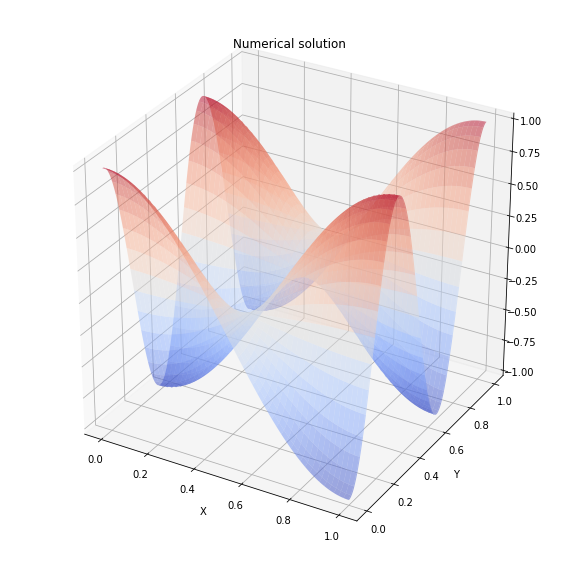

In [118]:
#plotting the function
fig = figure(figsize=[10,10])
ax = fig.gca(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Numerical solution")
surf2 = ax.plot_surface(X[0], X[1], my_little_function(order=10)[1], rstride=5, cstride=5, cmap=cm.coolwarm, alpha=0.5)

In [108]:
error=[]
all_order=[]
for iterations in range(2,15):
    print(iterations)
    all_order.append(iterations)
    error.append(my_little_function(order=iterations)[0])

2
The error associated with order 2 and quadrature 9 is 0.5232005370920303
3
The error associated with order 3 and quadrature 9 is 0.5232005370920303
4
The error associated with order 4 and quadrature 9 is 0.29508345542660824
5
The error associated with order 5 and quadrature 9 is 0.29508345542660785
6
The error associated with order 6 and quadrature 9 is 0.05073419548718502
7
The error associated with order 7 and quadrature 9 is 0.050734195487184816
8
The error associated with order 8 and quadrature 9 is 0.0031298061733125524
9
The error associated with order 9 and quadrature 9 is 0.0031298061733135174
10
The error associated with order 10 and quadrature 9 is 0.00010337514853505983
11
The error associated with order 11 and quadrature 9 is 0.00010337514853461323
12
The error associated with order 12 and quadrature 9 is 0.28793197589605923
13
The error associated with order 13 and quadrature 9 is 0.28793197589599
14
The error associated with order 14 and quadrature 9 is 1.75001200380290

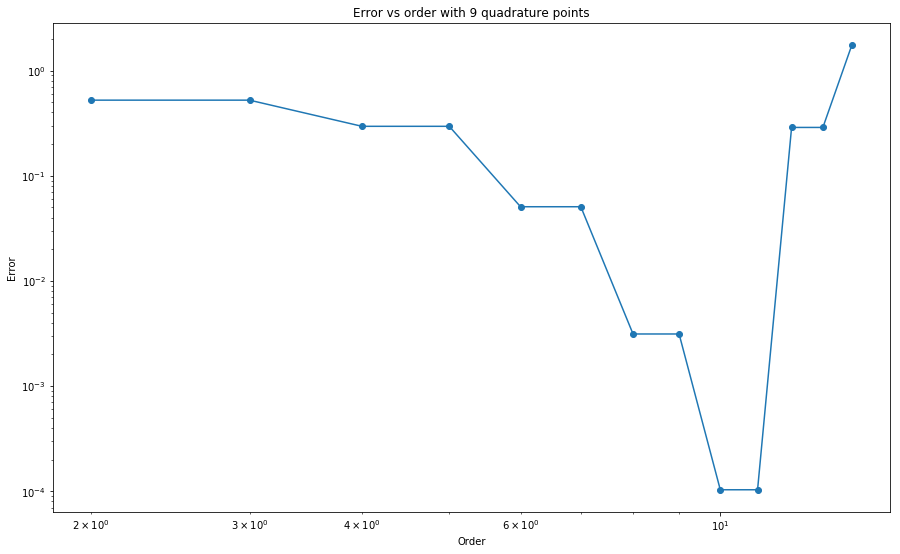

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Order")
ax.set_ylabel("Error")

ax.set_title("Error vs order with 9 quadrature points");

ax.plot( all_order,error, "o-");

In [ ]:

#grid search on parameters
list_of_errors=[]
error=[]
all_order=[]
all_quadrature=[]
for quadratures in range (10,200,10):
    all_quadrature.append(quadrature_size_matrices)
    
    for iterations in range(2,50,5):
        #print(iterations)
        #print(quadratures)
        all_order.append(iterations)
        
        error.append(my_little_function(order=iterations,quadrature_size_matrices=quadratures,quadrature_size_rhs=quadratures,quadrature_size_error=quadratures)[0])
    
    list_of_errors.append(error)
    error=[]        

The error associated with order 2 and quadrature 10 is 0.5232261142892911
The error associated with order 7 and quadrature 10 is 0.05097117985154946
The error associated with order 12 and quadrature 10 is 0.02707001792093357
The error associated with order 17 and quadrature 10 is 1.7505205463118463
The error associated with order 22 and quadrature 10 is 49.348183885377864
The error associated with order 27 and quadrature 10 is 49.34818388545109
The error associated with order 32 and quadrature 10 is 49.34818388561582
The error associated with order 37 and quadrature 10 is 49.348183888569174
The error associated with order 42 and quadrature 10 is 49.34818388566032
The error associated with order 47 and quadrature 10 is 49.348183885560985
The error associated with order 2 and quadrature 20 is 0.5232245469621248
The error associated with order 7 and quadrature 20 is 0.050955784931769804
The error associated with order 12 and quadrature 20 is 9.554244019877625e-06
The error associated with

2
The error associated with order 2 and quadrature 100 is 0.5232245469621166
5
The error associated with order 5 and quadrature 100 is 0.29512580102286406
8
The error associated with order 8 and quadrature 100 is 0.004544175086438267
11
The error associated with order 11 and quadrature 100 is 0.0002516467899960028
14
The error associated with order 14 and quadrature 100 is 2.649581354771775e-07
17
The error associated with order 17 and quadrature 100 is 5.611014504604589e-09
20
The error associated with order 20 and quadrature 100 is 1.276673333825592e-12
23
The error associated with order 23 and quadrature 100 is 7.360465014191329e-14
26
The error associated with order 26 and quadrature 100 is 1.650486721019548e-13
29
The error associated with order 29 and quadrature 100 is 3.4717498532574397e-13


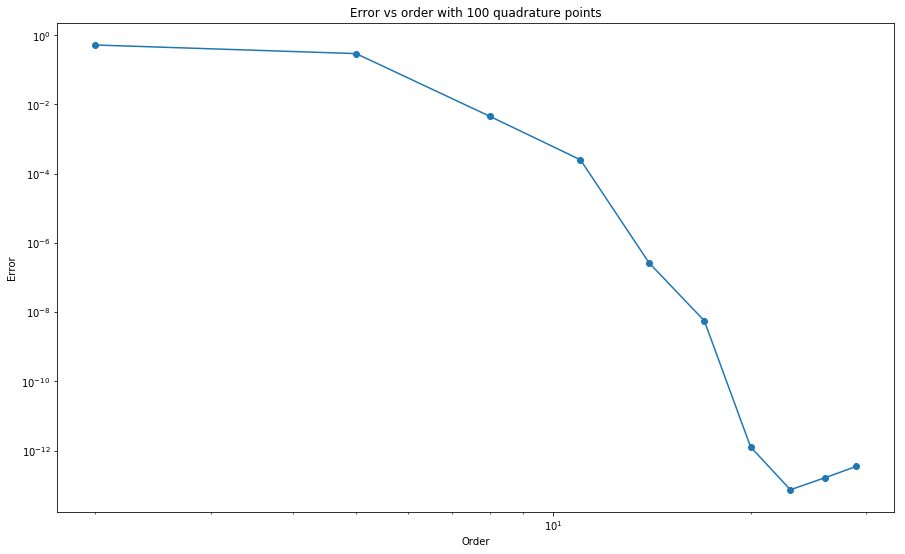

In [75]:
error=[]
all_order=[]
quadratures=100
for iterations in range(2,32,3):
    print(iterations)
    all_order.append(iterations)
    error.append(my_little_function(order=iterations,quadrature_size_matrices=quadratures,quadrature_size_rhs=quadratures,quadrature_size_error=quadratures)[0])
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Order")
ax.set_ylabel("Error")

ax.set_title("Error vs order with %i quadrature points" %quadratures);

ax.plot( all_order,error, "o-");    

### 13 [OPTIONAL] Augment the function above

Make it take an optional argument that switches from a direct to an iterative solver (use CG, with a simple preconditioner of your choice).

Make a plot of cost it takes to run with iterative VS direct solvers. Is there a cross over point? For what degree?

### 14 [OPTIONAL] Matrix free

Using the iterative solver, implement a matrix-free approach where the computation of the matrices is substituted with a  function that returns the *matrix-vector* product. In doing so, you must take care of rewriting the assemble of the matrix as a sum of many *matrix-matrix* products exploiting all the possible tensor products. 

Compare and comment the compuational cost of 100 matrix-vector product when the matrix is assembled and when it is computed on-the-fly as a function of the degree of the finite element. Is there a cross-over point? Is matrix free always convenient?

To see an explanation of how matrix free works, take a look at this page: 

https://www.dealii.org/8.5.0/doxygen/deal.II/step_37.html

In [77]:
(1673.87+341.51+150)/2


1082.69